In [1]:
import pandas as pd
from os import listdir
import gzip
import codecs

In [2]:
df = pd.read_csv('datasets/12-22-18/title.basics.tsv', sep='\t')
df = df.replace(r'(\\N)','',regex=True)
df.head()

/Users/bradkittrell/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,,,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,,1,"Comedy,Short"


# What are some of the counts of title type, adult, start and end years and runtime

## this is everything BTW - Lets just see what we are working with

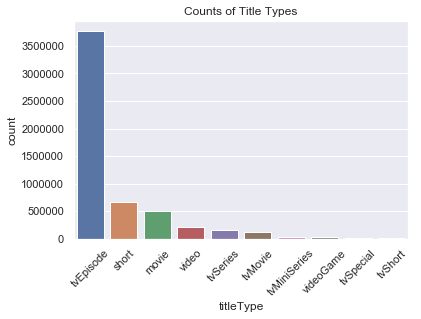

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")
ax = sns.countplot(x="titleType", data=df,orient='h',order=df['titleType'].value_counts().index)
plt.title('Counts of Title Types')
#ax.set(yscale="log") Left this out just to emphasize the huge diffrences in sizes
for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()

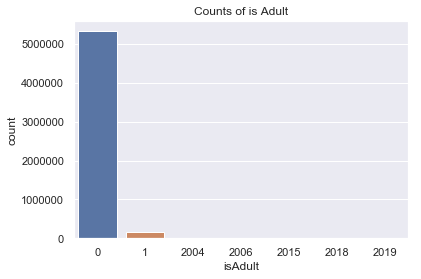

cleaning is needed here


In [40]:
aa = sns.countplot(x='isAdult',data=df)
plt.title('Counts of is Adult')
plt.show()
print('cleaning is needed here')

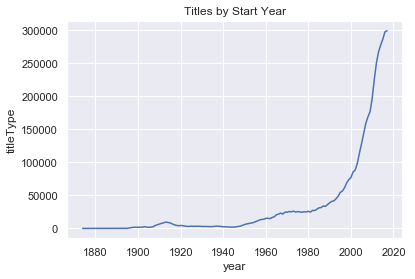

In [68]:
df['startYear'] = pd.to_numeric(df['startYear'])
df['endYear'] = pd.to_numeric(df['endYear'])
#df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes']) I need to come back to this tripped an error
#^convert data to numerics
gyears = df.groupby('startYear').count()
gyearsRevised = pd.DataFrame(gyears['titleType'])
gyearsRevised['year'] = gyears.index.values
gyearsRevised = gyearsRevised[gyearsRevised['year']<2018]
ax2=sns.lineplot(x='year',y='titleType',data=gyearsRevised)
plt.title('Titles by Start Year')
plt.show()

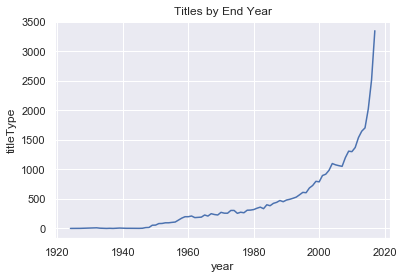

In [69]:
gyearsEnding = df.groupby('endYear').count()
gyearsRevisedEnding = pd.DataFrame(gyearsEnding['titleType'])
gyearsRevisedEnding['year'] = gyearsEnding.index.values
gyearsRevisedEnding = gyearsRevisedEnding[gyearsRevisedEnding['year']<2018]
gyearsRevisedEnding = gyearsRevisedEnding[gyearsRevisedEnding['year']>1900]
ax3=sns.lineplot(x='year',y='titleType',data=gyearsRevisedEnding)
plt.title('Titles by End Year')
plt.show()

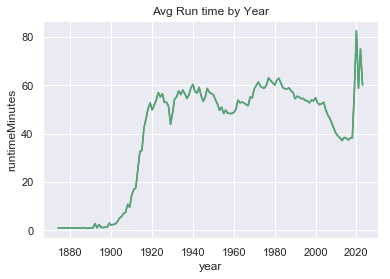

In [67]:
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'],errors='coerce')
avgruntime = df.groupby('startYear').mean()
avgruntimeRev = pd.DataFrame(avgruntime['runtimeMinutes'])
avgruntimeRev['year'] = avgruntime.index.values
sns.lineplot(x='year',y='runtimeMinutes',data=avgruntimeRev)
plt.title('Avg Run time by Year')
plt.show()

#### some odd observations with the data, since this focus will be on films we will down sample our set to 'movies' and basically redo this type of analysis

In [72]:
#save it to csv
df.to_csv('datasets/12-22-18-converted/Titles-basic.csv',index=False)